<a href="https://colab.research.google.com/github/Shuraimi/Predicting-Nashik-Weather/blob/main/Predicting_Nashik_Weather_final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Nashik Weather

In this project, I'll use the given features in the dataset and predict the weather condition of Nashik.

## 1. Problem definition

> The goal of is to predict weather-condition given the feature columns of the City Nashik.

## 2. Data

The data is taken from this competition https://kaggle.com/competitions/ml-olympiad-nashik-whether

The dataset has two parts:-
1. train.csv - the training set from which you have to create test set to evaluate your model
2. test.csv - the test set to evaluate your model on kaggle with missing column weather-condition
3. sample_submission.csv - a sample submission file in the correct format

## 3. Evaluation

Being classification problem where you have the classify the weather-condition between rain, partly-cloudy, and cloudy. The evaluation criteria for the submissions is `F1 score`.

## 4. Features

Here's the data dictionary of the columns

- month: Month of the recorded data.
year: Year of the recorded data.
- ID: Unique ID to track a data point not a feature to train on
- tempmax: Maximum temperature recorded in Fahrenheit (°F).
- tempmin: Minimum temperature recorded in Fahrenheit (°F).
- temp: Current temperature recorded in Fahrenheit (°F).
- dew: Dew point temperature recorded in Fahrenheit (°F) - Temperature at which air becomes saturated and dew forms.
- humidity: Relative humidity recorded in percentage - Amount of water vapor present in the air relative to the maximum amount the air can hold at that temperature.
- windgust: Maximum wind gust speed recorded in km/h.
* windspeed: Average wind speed recorded in km/h.
* winddir: Wind direction recorded in degrees.
* sealevelpressure: Atmospheric pressure at sea level recorded in hPa (hectopascals).
* cloudcover: Cloud cover recorded in percentage.
* visibility: Visibility recorded in kilometers.
* solarradiation: Solar radiation recorded in watts per square meter (W/m²) - Amount of radiant energy from the sun.
* solarenergy: Solar energy recorded in joules per square meter (J/m²).
weather-* condition: Description of the weather condition.
* month: Month of the recorded data.
* year: Year of the recorded data.

### Importing the libraries

In [ ]:
# importing standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the data (training data)

In [ ]:
data_train=pd.read_csv('https://raw.githubusercontent.com/Shuraimi/Predicting-Nashik-Weather/main/data/train.csv')

In [ ]:
data_train.head()

,month,year,ID,tempmax,tempmin,temp,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,weather-condition
0,11,2022,1323,79.9,50.1,65.3,41.5,46.2,18.6,13.9,81.0,1014.2,4.9,9.3,230.0,19.9,clear-day
1,12,2022,1362,89.6,50.1,71.6,50.1,50.6,11.2,10.3,285.4,1018.2,4.3,7.1,214.8,18.7,clear-day
2,3,2022,1079,95.1,69.9,81.9,44.3,30.1,19.7,9.2,308.5,1009.9,61.7,6.5,240.5,20.8,partly-cloudy-day
3,5,2022,1148,93.3,72.6,81.7,66.2,61.8,27.1,20.8,264.7,1007.7,19.6,7.8,315.2,27.3,clear-day
4,11,2023,1694,85.4,67.4,73.5,62.9,71.2,18.8,15.2,158.2,1012.0,70.9,10.2,139.4,12.1,rain


## Exploring the data

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              634 non-null    int64  
 1   year               634 non-null    int64  
 2   ID                 634 non-null    int64  
 3   tempmax            634 non-null    float64
 4   tempmin            634 non-null    float64
 5   temp               634 non-null    float64
 6   dew                634 non-null    float64
 7   humidity           634 non-null    float64
 8   windgust           627 non-null    float64
 9   windspeed          634 non-null    float64
 10  winddir            634 non-null    float64
 11  sealevelpressure   634 non-null    float64
 12  cloudcover         634 non-null    float64
 13  visibility         634 non-null    float64
 14  solarradiation     634 non-null    float64
 15  solarenergy        634 non-null    float64
 16  weather-condition  634 non

In [ ]:
# check missing values in each column
data_train.isna().sum()

month                0
year                 0
ID                   0
tempmax              0
tempmin              0
temp                 0
dew                  0
humidity             0
windgust             7
windspeed            0
winddir              0
sealevelpressure     0
cloudcover           0
visibility           0
solarradiation       0
solarenergy          0
weather-condition    0
dtype: int64

We have no missing values but have only 7 missing values in windgust column. Therefore fill it using Pandas `fillna()` or use Scikit Learn `SimpleImputer()`.

I'll use `fillna()` because I have only 7 missing values.

In [ ]:

# retrieving only those records in the data which have missing values in windgust
data_train.windgust[data_train.windgust.isna()==True]

63    NaN
208   NaN
337   NaN
348   NaN
397   NaN
506   NaN
563   NaN
Name: windgust, dtype: float64

Fill this missing value with either mean, median or mode.

In [ ]:
data_train.windgust.mean()

18.74401913875598

In [ ]:
data_train.windgust.median()

18.3

In [ ]:
data_train.windgust.mode()

0    11.4
Name: windgust, dtype: float64

In [ ]:
data_train.windgust.value_counts()

11.4    13
22.6    12
16.3    11
16.8    11
23.3    11
        ..
7.8      1
28.9     1
37.6     1
30.9     1
32.7     1
Name: windgust, Length: 131, dtype: int64

So I'll fill the windgust column's missing values with the mean.

In [ ]:
data_train.windgust.fillna(data_train.windgust.mean(),inplace=True)

In [ ]:
data_train.head()

,month,year,ID,tempmax,tempmin,temp,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,weather-condition
0,11,2022,1323,79.9,50.1,65.3,41.5,46.2,18.6,13.9,81.0,1014.2,4.9,9.3,230.0,19.9,clear-day
1,12,2022,1362,89.6,50.1,71.6,50.1,50.6,11.2,10.3,285.4,1018.2,4.3,7.1,214.8,18.7,clear-day
2,3,2022,1079,95.1,69.9,81.9,44.3,30.1,19.7,9.2,308.5,1009.9,61.7,6.5,240.5,20.8,partly-cloudy-day
3,5,2022,1148,93.3,72.6,81.7,66.2,61.8,27.1,20.8,264.7,1007.7,19.6,7.8,315.2,27.3,clear-day
4,11,2023,1694,85.4,67.4,73.5,62.9,71.2,18.8,15.2,158.2,1012.0,70.9,10.2,139.4,12.1,rain


In [ ]:
# now check for missing values
data_train.isna().sum()

month                0
year                 0
ID                   0
tempmax              0
tempmin              0
temp                 0
dew                  0
humidity             0
windgust             0
windspeed            0
winddir              0
sealevelpressure     0
cloudcover           0
visibility           0
solarradiation       0
solarenergy          0
weather-condition    0
dtype: int64

In [ ]:
# ID column is not useful for the prediction so I'll drop it
data_train.drop('ID',axis=1,inplace=True)

In [ ]:
data_train.head()

,month,year,tempmax,tempmin,temp,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,weather-condition
0,11,2022,79.9,50.1,65.3,41.5,46.2,18.6,13.9,81.0,1014.2,4.9,9.3,230.0,19.9,clear-day
1,12,2022,89.6,50.1,71.6,50.1,50.6,11.2,10.3,285.4,1018.2,4.3,7.1,214.8,18.7,clear-day
2,3,2022,95.1,69.9,81.9,44.3,30.1,19.7,9.2,308.5,1009.9,61.7,6.5,240.5,20.8,partly-cloudy-day
3,5,2022,93.3,72.6,81.7,66.2,61.8,27.1,20.8,264.7,1007.7,19.6,7.8,315.2,27.3,clear-day
4,11,2023,85.4,67.4,73.5,62.9,71.2,18.8,15.2,158.2,1012.0,70.9,10.2,139.4,12.1,rain


In [ ]:
# check the columns in the dataset
data_train.columns

Index(['month', 'year', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity',
       'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'weather-condition'],
      dtype='object')

In [ ]:
# check the dtypes of columns
data_train.dtypes

month                  int64
year                   int64
tempmax              float64
tempmin              float64
temp                 float64
dew                  float64
humidity             float64
windgust             float64
windspeed            float64
winddir              float64
sealevelpressure     float64
cloudcover           float64
visibility           float64
solarradiation       float64
solarenergy          float64
weather-condition     object
dtype: object

Also fill missing values in test data

In [ ]:
data_test=pd.read_csv('https://raw.githubusercontent.com/Shuraimi/Predicting-Nashik-Weather/main/data/test.csv')

In [ ]:
data_test.isna().sum()

month               0
year                0
ID                  0
tempmax             0
tempmin             0
temp                0
dew                 0
humidity            0
windgust            2
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
dtype: int64

In [ ]:
data_test.windgust.fillna(data_test.windgust.mean(), inplace=True)

All dtypes are correct now explore the data.

#### Comparing `tempmax` vs `year`

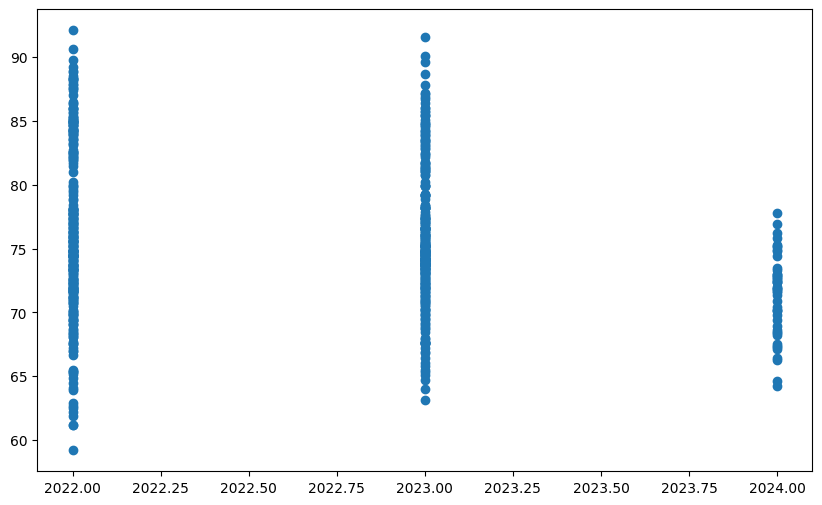

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(x=data_train.year,y=data_train.temp)

#### Distribution of sealevelpressure

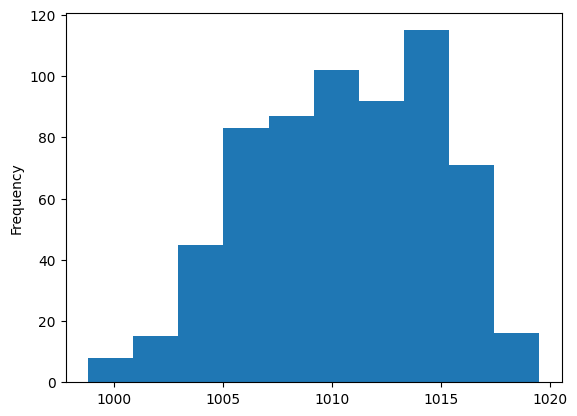

In [ ]:
data_train.sealevelpressure.plot.hist();

This looks somewhat like a normal distribution.

#### Which month has most solarradiation?

<BarContainer object of 634 artists>

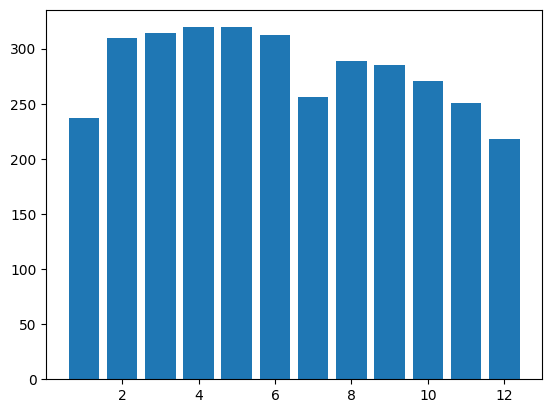

In [ ]:
plt.bar(x=data_train.month,height=data_train.solarradiation)

4 th month i.e. April has the most solarradiation.

#### Dew vs weather-condition?

In [ ]:
# group the weather condition column
weather_grouped=data_train.groupby(by='weather-condition',as_index=False).mean()

In [ ]:
weather_grouped

,weather-condition,month,year,tempmax,tempmin,temp,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy
0,clear-day,4.586498,2022.696203,89.077215,58.800422,74.322785,48.123629,45.432911,15.956490,11.075527,196.377215,1013.227004,7.129958,8.132068,254.684810,21.970464
1,partly-cloudy-day,6.045752,2022.660131,90.284314,64.553595,77.153595,53.438562,49.432026,17.912262,11.943137,184.397386,1011.624837,38.502614,8.401307,245.929412,21.201307
2,rain,7.504098,2022.508197,84.129918,70.025820,75.789344,68.520492,80.790984,21.973131,15.041393,241.263115,1007.271721,73.818443,7.070902,180.154918,15.560656


In [ ]:
data_train.head()

,month,year,tempmax,tempmin,temp,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,weather-condition
0,11,2022,79.9,50.1,65.3,41.5,46.2,18.6,13.9,81.0,1014.2,4.9,9.3,230.0,19.9,clear-day
1,12,2022,89.6,50.1,71.6,50.1,50.6,11.2,10.3,285.4,1018.2,4.3,7.1,214.8,18.7,clear-day
2,3,2022,95.1,69.9,81.9,44.3,30.1,19.7,9.2,308.5,1009.9,61.7,6.5,240.5,20.8,partly-cloudy-day
3,5,2022,93.3,72.6,81.7,66.2,61.8,27.1,20.8,264.7,1007.7,19.6,7.8,315.2,27.3,clear-day
4,11,2023,85.4,67.4,73.5,62.9,71.2,18.8,15.2,158.2,1012.0,70.9,10.2,139.4,12.1,rain


In [ ]:
type(weather_grouped)

pandas.core.frame.DataFrame

<Axes: xlabel='weather-condition'>

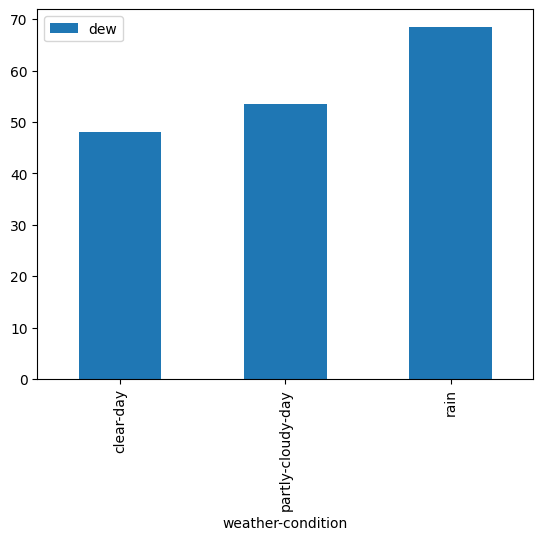

In [ ]:
weather_grouped.plot('weather-condition','dew',kind='bar')

So this means, there's more dew when the weather is rainy. 🌧️

#### Weather condition vs solarradiation

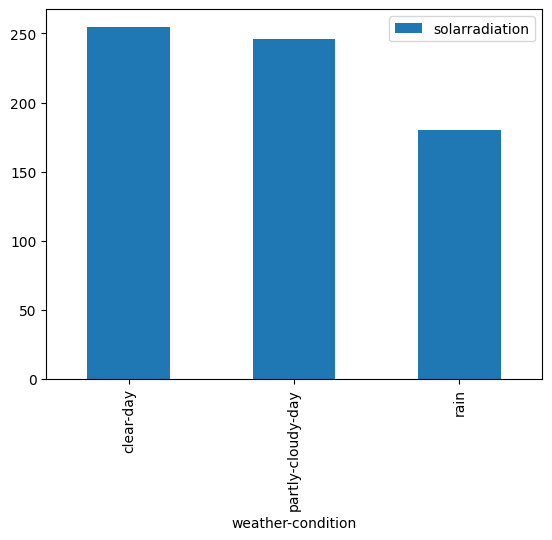

In [ ]:
weather_grouped.plot('weather-condition','solarradiation',kind='bar');

As expected, there's average solarradiation is more when the weather is clear day ☀️.

Now what will be the condition that favours partly-cloudy-day. ☁️

#### Weather condition vs partly cloudy day

In [ ]:
weather_grouped

,weather-condition,month,year,tempmax,tempmin,temp,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy
0,clear-day,4.586498,2022.696203,89.077215,58.800422,74.322785,48.123629,45.432911,15.956490,11.075527,196.377215,1013.227004,7.129958,8.132068,254.684810,21.970464
1,partly-cloudy-day,6.045752,2022.660131,90.284314,64.553595,77.153595,53.438562,49.432026,17.912262,11.943137,184.397386,1011.624837,38.502614,8.401307,245.929412,21.201307
2,rain,7.504098,2022.508197,84.129918,70.025820,75.789344,68.520492,80.790984,21.973131,15.041393,241.263115,1007.271721,73.818443,7.070902,180.154918,15.560656


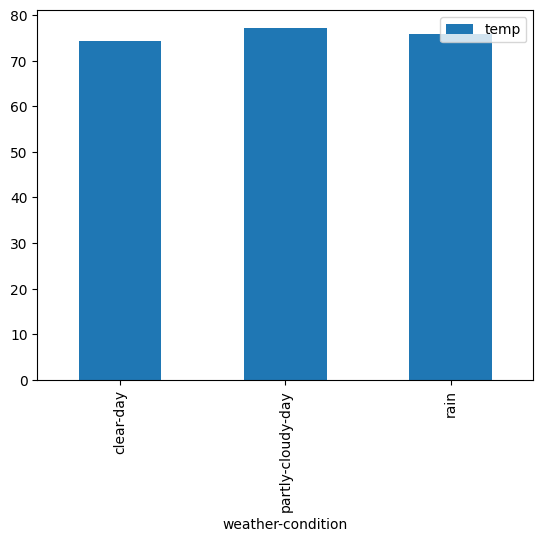

In [ ]:
weather_grouped.plot('weather-condition','temp',kind='bar');

When it's partly cloudy day, average temperature is slightly more than the remaining conditions.

So now we have explored a few columns, we'll also look at the correlation of different columns to target and then start with modelling.

In [ ]:
data_train.corr()

<ipython-input-32-e6bb2ed549f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_train.corr()


,month,year,tempmax,tempmin,temp,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy
month,1.000000,-0.245000,-0.206147,0.280749,-0.006943,0.455681,0.434165,-0.027906,0.042134,-0.150610,-0.224345,0.360250,0.092786,-0.263630,-0.261114
year,-0.245000,1.000000,-0.096057,-0.114371,-0.165775,-0.251805,-0.197742,-0.138835,-0.098048,-0.044797,0.177488,-0.130902,0.564454,0.056051,0.057539
tempmax,-0.206147,-0.096057,1.000000,0.293631,0.843324,-0.252336,-0.619440,-0.101199,-0.000045,0.244664,-0.041358,-0.389906,0.083250,0.680589,0.678303
tempmin,0.280749,-0.114371,0.293631,1.000000,0.729430,0.714152,0.422749,0.518066,0.596188,0.470018,-0.790035,0.597139,-0.040034,-0.050863,-0.049704
temp,-0.006943,-0.165775,0.843324,0.729430,1.000000,0.202950,-0.208265,0.252143,0.341750,0.420090,-0.473859,0.069737,-0.016552,0.426035,0.424826
dew,0.455681,-0.251805,-0.252336,0.714152,0.202950,1.000000,0.899734,0.457031,0.512536,0.289318,-0.711443,0.753472,-0.259479,-0.402129,-0.399746
humidity,0.434165,-0.197742,-0.619440,0.422749,-0.208265,0.899734,1.000000,0.398181,0.382787,0.160479,-0.549526,0.767064,-0.294758,-0.622541,-0.619506
windgust,-0.027906,-0.138835,-0.101199,0.518066,0.252143,0.457031,0.398181,1.000000,0.779377,0.335855,-0.628358,0.529308,-0.277255,-0.348628,-0.350695
windspeed,0.042134,-0.098048,-0.000045,0.596188,0.341750,0.512536,0.382787,0.779377,1.000000,0.409038,-0.663350,0.465802,-0.081720,-0.128733,-0.127215
winddir,-0.150610,-0.044797,0.244664,0.470018,0.420090,0.289318,0.160479,0.335855,0.409038,1.000000,-0.487857,0.219495,-0.059784,0.096135,0.099453


`corr()` is not useful because the target column is of object dtype and so it's skipped in the correlation.

## 5. Modelling

In this section, we'll train a machine learning model to predict the weather condition in Nashik.

- First split the data into X and y
- No need to create train test splits beacuse the dataset as different csv files for train and test sets.

In [ ]:
data_train.columns

Index(['month', 'year', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity',
       'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'weather-condition'],
      dtype='object')

In [ ]:
data_train.head()

,month,year,tempmax,tempmin,temp,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,weather-condition
0,11,2022,79.9,50.1,65.3,41.5,46.2,18.6,13.9,81.0,1014.2,4.9,9.3,230.0,19.9,clear-day
1,12,2022,89.6,50.1,71.6,50.1,50.6,11.2,10.3,285.4,1018.2,4.3,7.1,214.8,18.7,clear-day
2,3,2022,95.1,69.9,81.9,44.3,30.1,19.7,9.2,308.5,1009.9,61.7,6.5,240.5,20.8,partly-cloudy-day
3,5,2022,93.3,72.6,81.7,66.2,61.8,27.1,20.8,264.7,1007.7,19.6,7.8,315.2,27.3,clear-day
4,11,2023,85.4,67.4,73.5,62.9,71.2,18.8,15.2,158.2,1012.0,70.9,10.2,139.4,12.1,rain


Split the training data into train and validation sets.

In [ ]:

from sklearn.model_selection import train_test_split
np.random.seed(42)

X=data_train.drop('weather-condition',axis=1)
y=data_train['weather-condition']

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

In [ ]:
# create a dictionary of classifiers
models={'Linear SVC':LinearSVC(multi_class='crammer_singer'),
'Decision Tree':DecisionTreeClassifier(),
'Extra Tree': ExtraTreesClassifier(),
'Random Forest': RandomForestClassifier(),
'Logistic Regression': LogisticRegression(multi_class='multinomial'),
'Ridge Classifier': RidgeClassifier()}

In [ ]:
#train on each of these classifiers and then store the evaluation metric of each
from sklearn.metrics import f1_score
f1_scores={}
np.random.seed(42)
for model_name,model in models.items():
    model.fit(X_train,y_train)
    y_preds=model.predict(X_val)
    f1_scores[model_name]=f1_score(y_val,y_preds,average='macro')

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
f1_scores

{'Linear SVC': 0.838393894143023,
 'Decision Tree': 0.879601918118509,
 'Extra Tree': 0.8922203087706576,
 'Random Forest': 0.9394229652850342,
 'Logistic Regression': 0.9018998714739079,
 'Ridge Classifier': 0.7768674228732406}

In [ ]:
f1_scores.values()

dict_values([0.838393894143023, 0.879601918118509, 0.8922203087706576, 0.9394229652850342, 0.9018998714739079, 0.7768674228732406])

RandomForestClassifier performed the best. This is the baseline model and it's performance is the baseline performance of 0.93

Therefore I'll consider RandomForestClassifier as the model.

In [ ]:

np.random.seed(42)
model=RandomForestClassifier()

In [ ]:
model.fit(X_train,y_train)
y_preds=model.predict(X_val)
print(f1_score(y_val,y_preds,average='macro'))

0.9306276511086288


### Cross validation score of the RandomForestClassifier

I need metric as macro f1 but that can't be done in cross val score therefore create a custom metric function using `make_scorer` from `metrics` as follows:-

In [ ]:

from sklearn.metrics import make_scorer
# create custom metric function
f1_macro=make_scorer(f1_score,average='macro')

In [ ]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
np.mean(cross_val_score(model,X_val,y_val,cv=10,scoring=f1_macro))

0.9346512746512745

### Tuning the model(RandomForestClassifier)

1. By hand
2. RandomizedSearchCV
3. GridSearchCV

**1. By hand**

In [ ]:

#np.random.seed(42)
model=RandomForestClassifier(n_estimators=500,random_state=42)

In [ ]:
model.fit(X_train,y_train)
y_preds=model.predict(X_val)
print(f1_score(y_val,y_preds,average='macro'))

0.9484963970475503


**2. RandomizedSearchCV**

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
#np.random.seed(42)
grid={'n_estimators':[200,400,500],
'max_depth':[None,2,4,6,8,10],
'min_samples_split':[10,15,20],
'max_features':['sqrt','log2',None],
'bootstrap':[True,False]}

In [ ]:
model=RandomForestClassifier(random_state=42)
rf_rs=RandomizedSearchCV(model,param_distributions=grid,cv=5,n_iter=10,verbose=2,n_jobs=2,scoring=f1_macro)

In [ ]:
# fit the randomised model
#np.random.seed(42)
rf_rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 2, 4, 6, 8, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_split': [10, 15, 20],
                                        'n_estimators': [200, 400, 500]},
                   scoring=make_scorer(f1_score, average=macro), verbose=2)

In [ ]:
# get the best params
#np.random.seed(42)
best_params=rf_rs.best_params_
best_estimator=rf_rs.best_estimator_

In [ ]:
best_params

{'n_estimators': 200,
 'min_samples_split': 10,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': True}

In [ ]:
best_estimator

RandomForestClassifier(max_features='log2', min_samples_split=10,
                       n_estimators=200, random_state=42)

In [ ]:

np.random.seed(42)
model=best_estimator

In [ ]:
model.fit(X_train,y_train)
y_preds=model.predict(X_val)
print(f1_score(y_val,y_preds,average='macro'))

0.9484963970475503


Now try GridSearchCV as below

In [ ]:

from sklearn.model_selection import GridSearchCV
#np.random.seed(42)
grid={'n_estimators':[100,200,300],
'max_depth':[None,10,20],
'min_samples_split':[10,15],
'max_features':['log2','sqrt'],
'bootstrap':[True,False]}

model=RandomForestClassifier(random_state=42)
rf_gs=GridSearchCV(model,param_grid=grid,n_jobs=2,verbose=0,cv=5,scoring=f1_macro)

In [ ]:
#np.random.seed(42)
rf_gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=2,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_split': [10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(f1_score, average=macro))

In [ ]:
best_params=rf_gs.best_params_
best_estimator=rf_gs.best_estimator_

In [ ]:
best_params

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_split': 10,
 'n_estimators': 200}

In [ ]:
best_estimator

RandomForestClassifier(max_features='log2', min_samples_split=10,
                       n_estimators=200, random_state=42)

In [ ]:


model=best_estimator

In [ ]:
model.fit(X_train,y_train)
y_preds=model.predict(X_val)
print(f1_score(y_val,y_preds,average='macro'))

0.9484963970475503


So there's no more improvement in the macro f1 score. So this is the final score and with these estimators, we'll create a final model to predict on th test set.

In [ ]:
np.random.seed(42)
model=best_estimator
model.fit(X_train,y_train)

RandomForestClassifier(max_features='log2', min_samples_split=10,
                       n_estimators=200, random_state=42)

In [ ]:
preds=model.predict(data_test.drop('ID',axis=1))

In [ ]:
preds=pd.Series(preds)

In [ ]:
ids=data_test.ID
ids

0      1137
1      1198
2      1739
3      1583
4      1655
       ... 
154    1737
155    1760
156    1541
157    1375
158    1434
Name: ID, Length: 159, dtype: int64

In [ ]:
submission=pd.DataFrame(ids,columns=['ID'])

In [ ]:
submission

,ID
0,1137
1,1198
2,1739
3,1583
4,1655
...,...
154,1737
155,1760
156,1541
157,1375


In [ ]:
submission ['weather-condition']=preds
submission

,ID,weather-condition
0,1137,clear-day
1,1198,rain
2,1739,clear-day
3,1583,rain
4,1655,partly-cloudy-day
...,...,...
154,1737,partly-cloudy-day
155,1760,partly-cloudy-day
156,1541,rain
157,1375,clear-day


Save this data frame into a CSV file

In [ ]:
submission.to_csv('submission.csv',index=False)

Even after a lot of attempts to improve model performance through hyperparameter tuning I'm getting the same score. Therefore this is the final model.